In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./datas/adult income.csv')
df.columns = df.columns.str.replace(" ","", regex=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.workclass.unique()

array(['?                ', 'Private          ', 'State-gov        ',
       'Federal-gov      ', 'Self-emp-not-inc ', 'Self-emp-inc     ',
       'Local-gov        ', 'Without-pay      ', 'Never-worked     '],
      dtype=object)

In [7]:
male = df[df['sex']=="Male   "]
male.workclass = male.workclass.str.replace(" ","", regex=True)
male

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
13,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [8]:
female = df[df['sex']=="Female "]
female.workclass = female.workclass.str.replace(" ","", regex=True)
female

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32547,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32548,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32550,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


In [9]:
male_workclass_mode = male.workclass.mode()[0]
male_workclass_mode

'Private'

In [10]:
female_workclass_mode = female.workclass.mode()[0]
female_workclass_mode

'Private'

In [11]:
male.workclass = male.workclass.str.replace('?',male_workclass_mode)
female.workclass = female.workclass.str.replace('?',female_workclass_mode)

In [12]:
female.workclass.value_counts()

workclass
Private             8591
Local-gov            835
State-gov            489
Self-emp-not-inc     399
Federal-gov          315
Self-emp-inc         135
Without-pay            5
Never-worked           2
Name: count, dtype: int64

In [13]:
df.loc[df['sex']=="Male   ",'workclass'] = male.workclass
df.loc[df['sex']=="Female ",'workclass'] = female.workclass
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [14]:
df.select_dtypes(include = ['object'])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Private,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,Private,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [15]:
df.select_dtypes(include = ['number'])

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [16]:
#standard scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [17]:
df['fnlwgt_ss'] = ss.fit_transform(df[['fnlwgt']])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,fnlwgt_ss
0,90,Private,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,-1.067997
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,-0.539169
2,66,Private,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,-0.035220
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,-0.468215
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0.709482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,1.140460
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.639741
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,-0.335433
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358777


In [18]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [19]:
df['fnlwgt_mm'] = mm.fit_transform(df[['fnlwgt']])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,fnlwgt_ss,fnlwgt_mm
0,90,Private,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,-1.067997,0.043987
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,-0.539169,0.081896
2,66,Private,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,-0.035220,0.118021
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,-0.468215,0.086982
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0.709482,0.171404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,1.140460,0.202298
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.639741,0.166404
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,-0.335433,0.096500
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358777,0.094827


In [20]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [21]:
df['fnlwgt_rs'] = rs.fit_transform(df[['fnlwgt']])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,fnlwgt_ss,fnlwgt_mm,fnlwgt_rs
0,90,Private,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,-1.067997,0.043987,-0.849686
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,-0.539169,0.081896,-0.381517
2,66,Private,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,-0.035220,0.118021,0.064626
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,-0.468215,0.086982,-0.318703
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0.709482,0.171404,0.723906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,1.140460,0.202298,1.105449
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.639741,0.166404,0.662165
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,-0.335433,0.096500,-0.201151
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,-0.358777,0.094827,-0.221818


In [22]:
# sns.pairplot(data = df)

<Axes: ylabel='fnlwgt'>

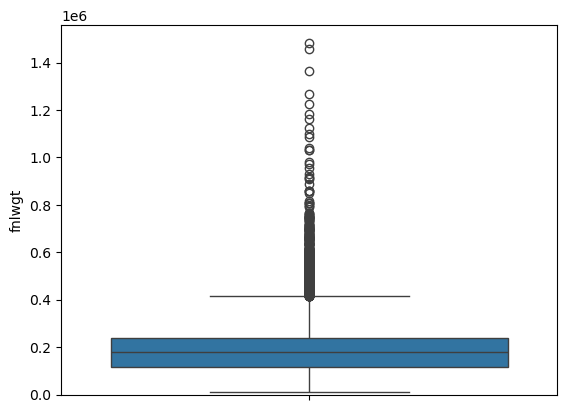

In [23]:
plt.hist(df.fnlwgt)
sns.boxplot(data = df.fnlwgt)

<Axes: ylabel='fnlwgt_ss'>

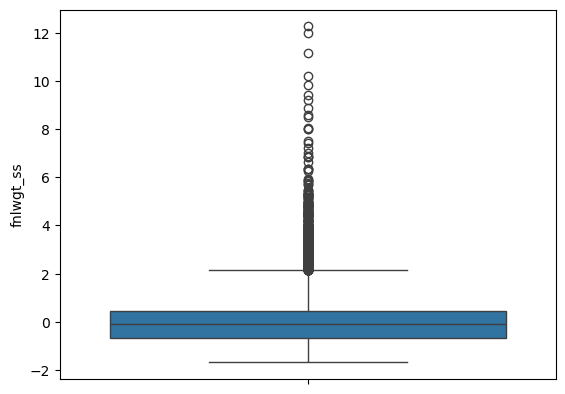

In [24]:
# plt.hist(df.fnlwgt_ss)
sns.boxplot(data = df.fnlwgt_ss)

<Axes: ylabel='fnlwgt_mm'>

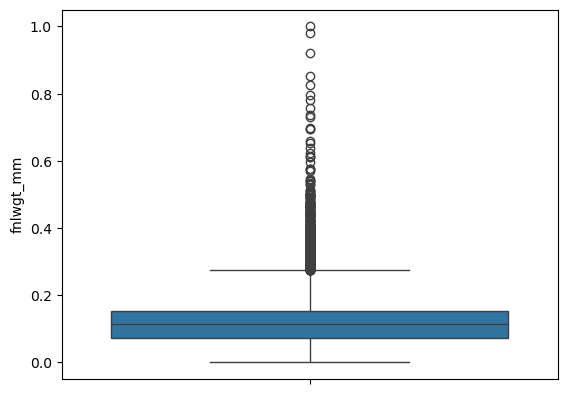

In [25]:
# plt.hist(df.fnlwgt_mm)
sns.boxplot(data = df.fnlwgt_mm)

<Axes: ylabel='fnlwgt_rs'>

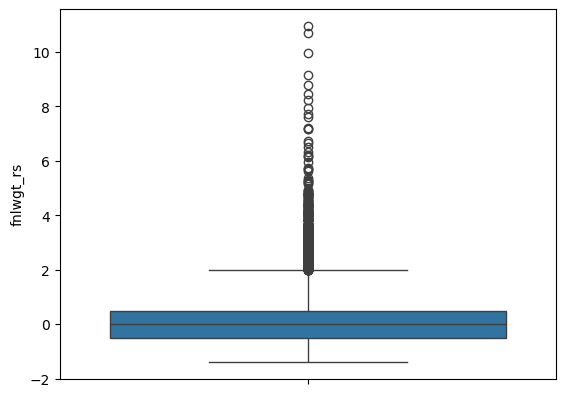

In [26]:
# plt.hist(df.fnlwgt_rs)
sns.boxplot(data = df.fnlwgt_rs)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,3.858165e+01,13.640433,17.000000,28.000000,37.000000,48.000000,9.000000e+01
fnlwgt,32561.0,1.897784e+05,105549.977697,12285.000000,117827.000000,178356.000000,237051.000000,1.484705e+06
education.num,32561.0,1.008068e+01,2.572720,1.000000,9.000000,10.000000,12.000000,1.600000e+01
capital.gain,32561.0,1.077649e+03,7385.292085,0.000000,0.000000,0.000000,0.000000,9.999900e+04
capital.loss,32561.0,8.730383e+01,402.960219,0.000000,0.000000,0.000000,0.000000,4.356000e+03
hours.per.week,32561.0,4.043746e+01,12.347429,1.000000,40.000000,40.000000,45.000000,9.900000e+01
fnlwgt_ss,32561.0,-1.008172e-16,1.000015,-1.681631,-0.681691,-0.108219,0.447877,1.226856e+01
fnlwgt_mm,32561.0,1.205453e-01,0.071685,0.000000,0.071679,0.112788,0.152651,1.000000e+00
fnlwgt_rs,32561.0,9.580593e-02,0.885308,-1.392933,-0.507691,0.000000,0.492309,1.095710e+01


(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <BarContainer object of 10 artists>)

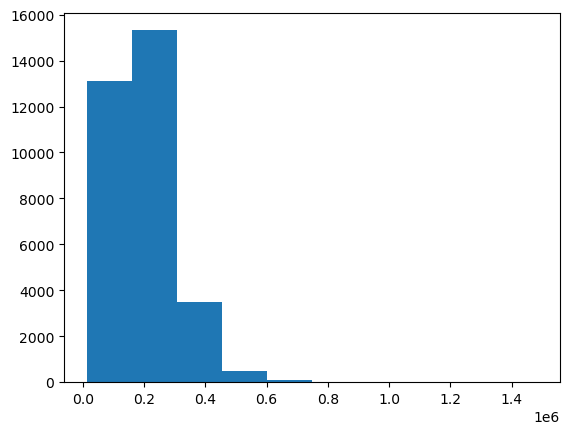

In [28]:
plt.hist(df.fnlwgt)

(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([-1.68163079, -0.28661144,  1.10840791,  2.50342726,  3.8984466 ,
         5.29346595,  6.6884853 ,  8.08350465,  9.478524  , 10.87354334,
        12.26856269]),
 <BarContainer object of 10 artists>)

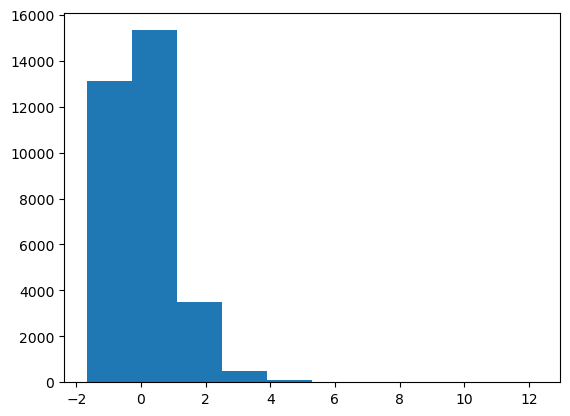

In [29]:
plt.hist(df.fnlwgt_ss)

(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

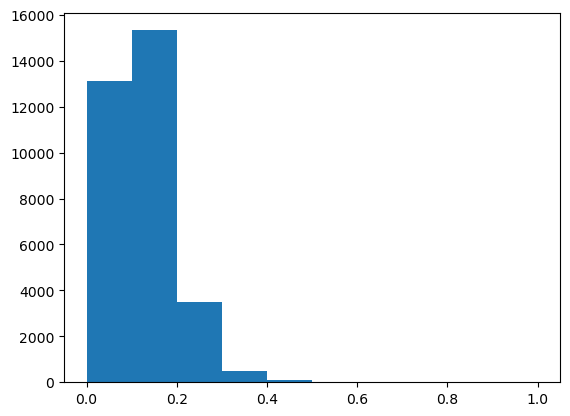

In [30]:
plt.hist(df.fnlwgt_mm)

(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([-1.39293263, -0.15792961,  1.07707341,  2.31207643,  3.54707945,
         4.78208247,  6.01708549,  7.25208851,  8.48709153,  9.72209454,
        10.95709756]),
 <BarContainer object of 10 artists>)

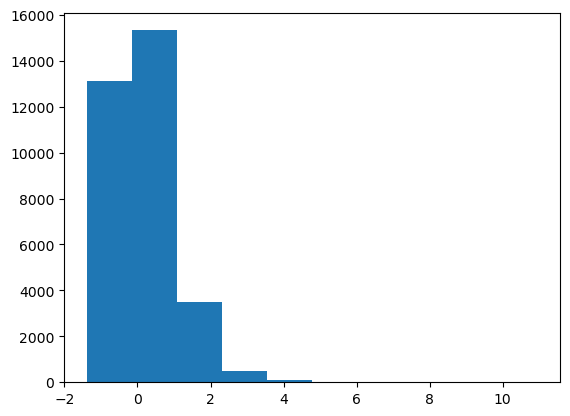

In [31]:
plt.hist(df.fnlwgt_rs)

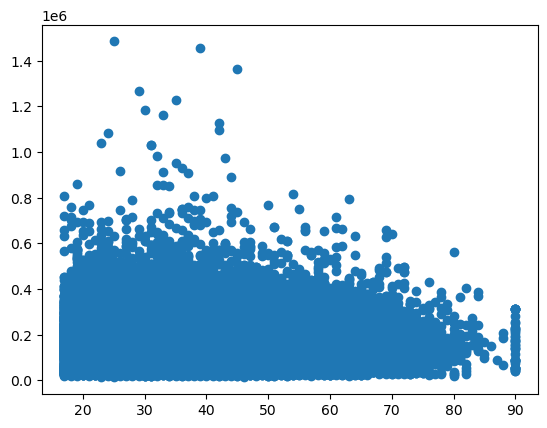

In [32]:
plt.scatter(df.age, df.fnlwgt)

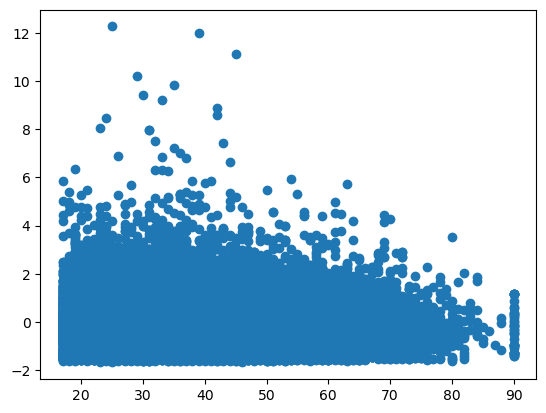

In [33]:
plt.scatter(df.age, df.fnlwgt_ss)

<Axes: xlabel='age', ylabel='Count'>

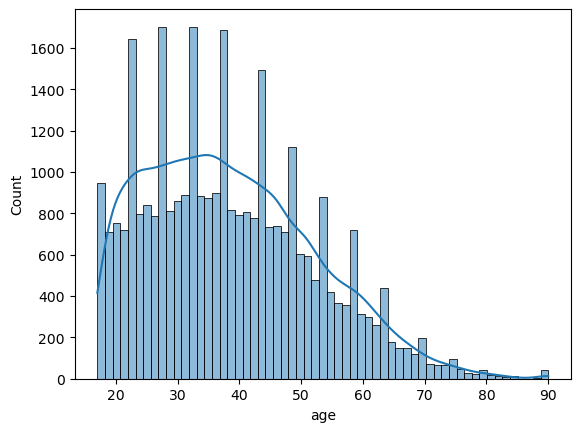

In [34]:
sns.histplot(df.age, kde = True)

<Axes: xlabel='fnlwgt', ylabel='Count'>

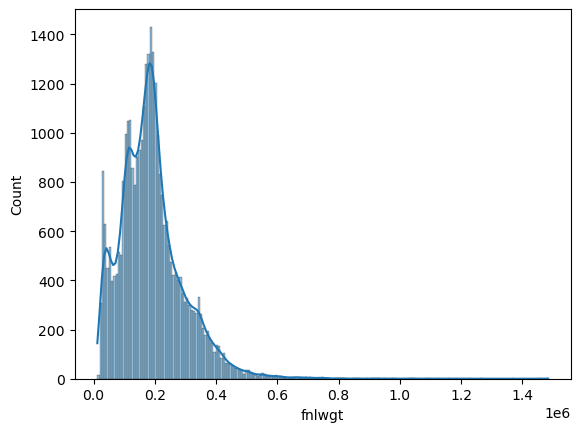

In [35]:
sns.histplot(df.fnlwgt, kde = True)

age


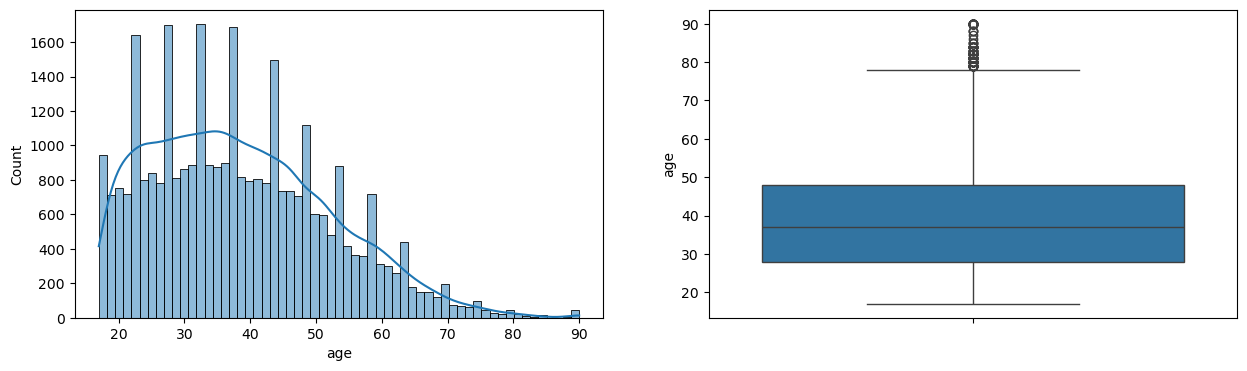

workclass


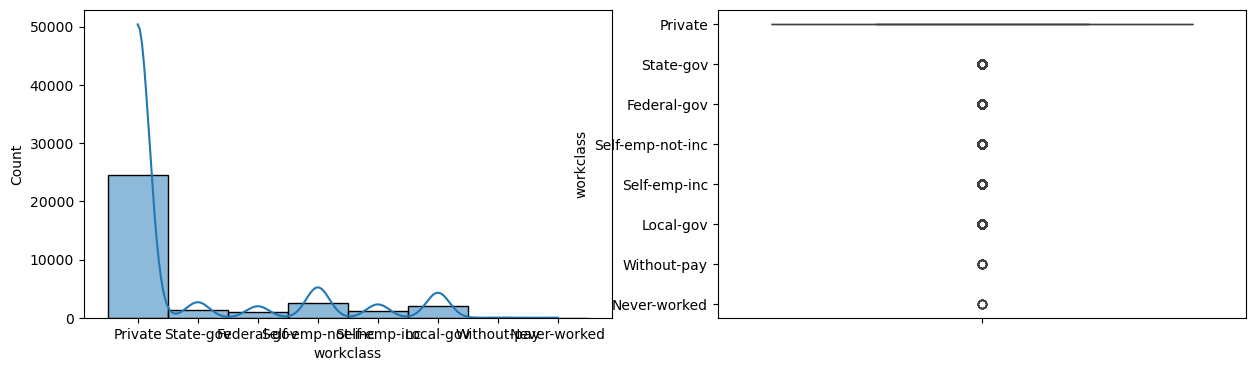

fnlwgt


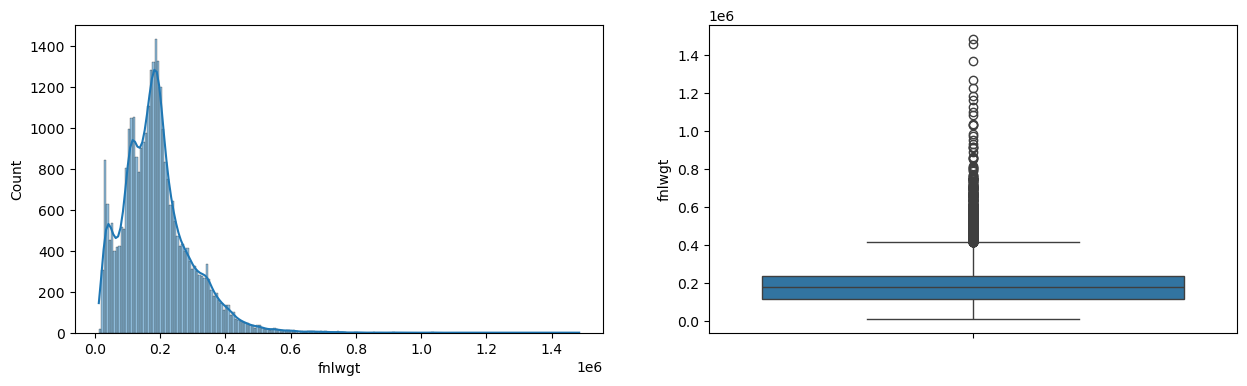

education


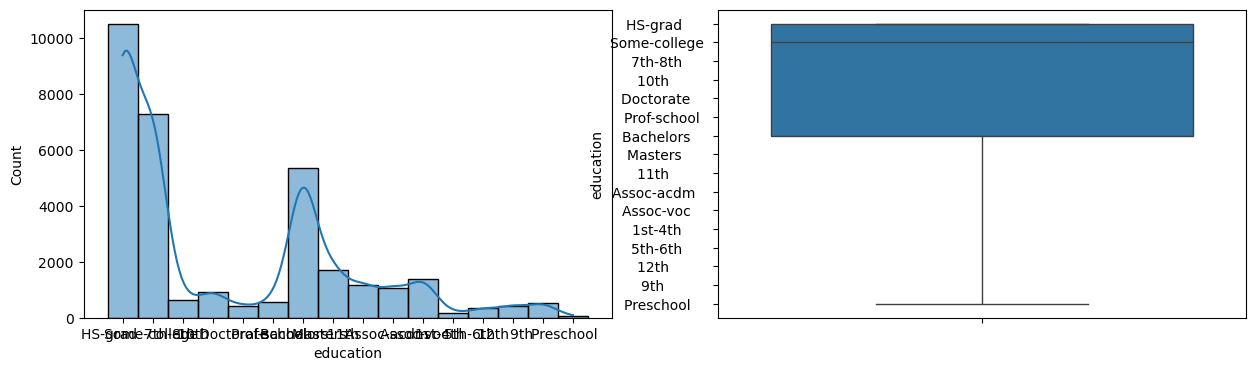

education.num


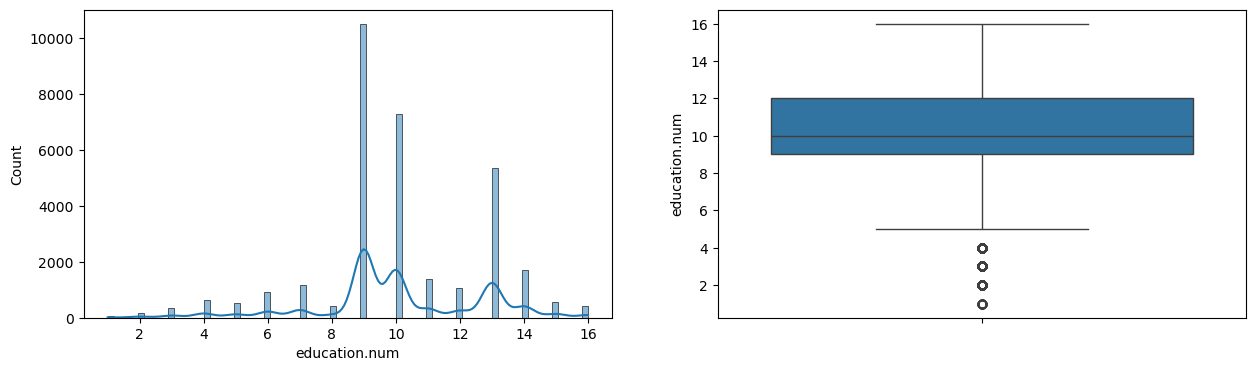

marital.status


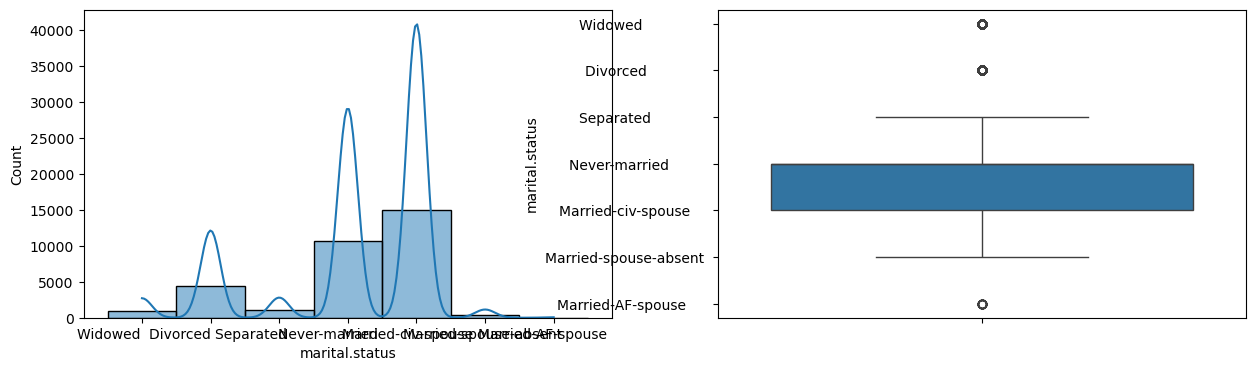

occupation


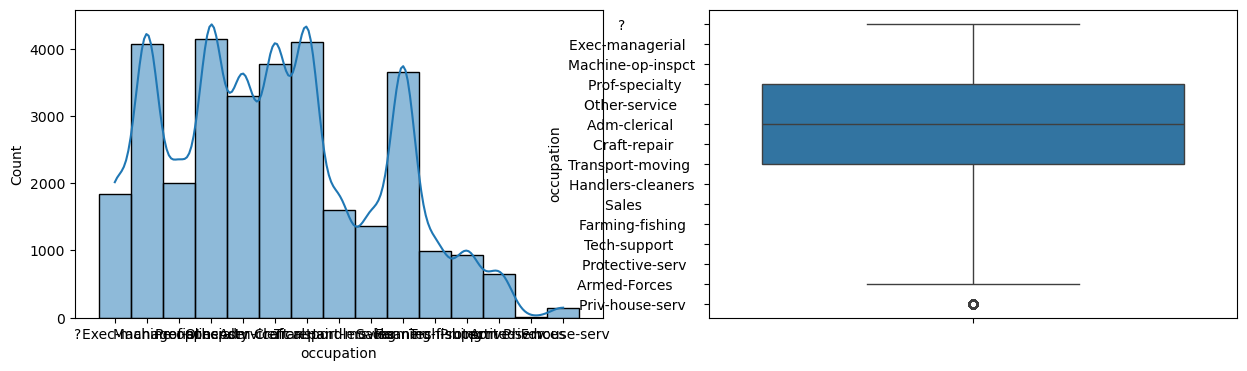

relationship


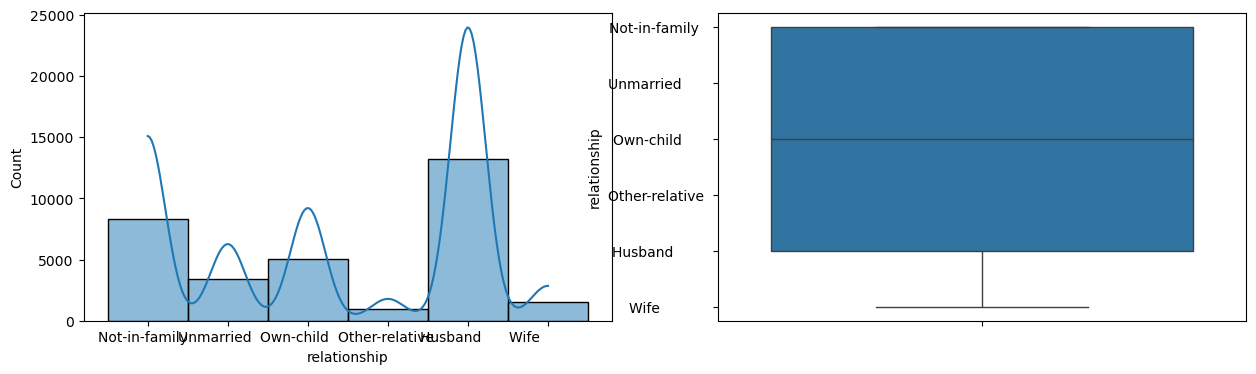

race


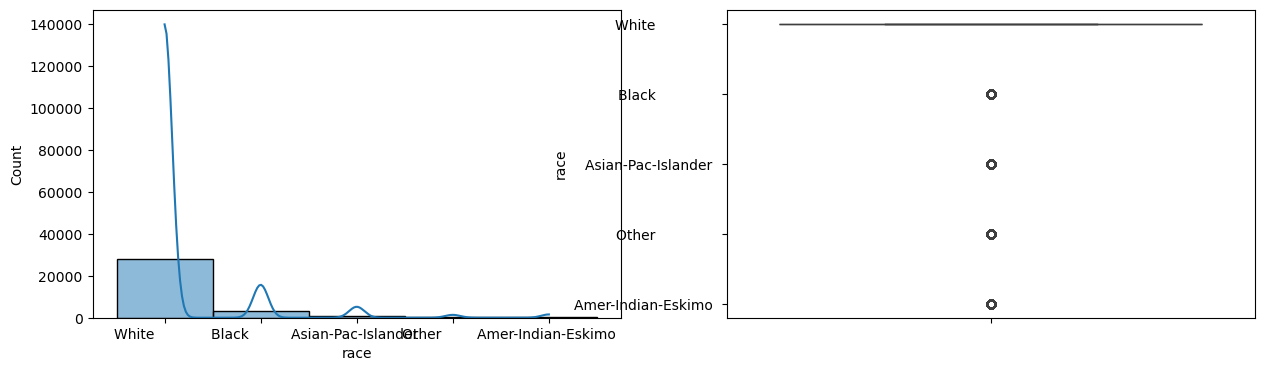

sex


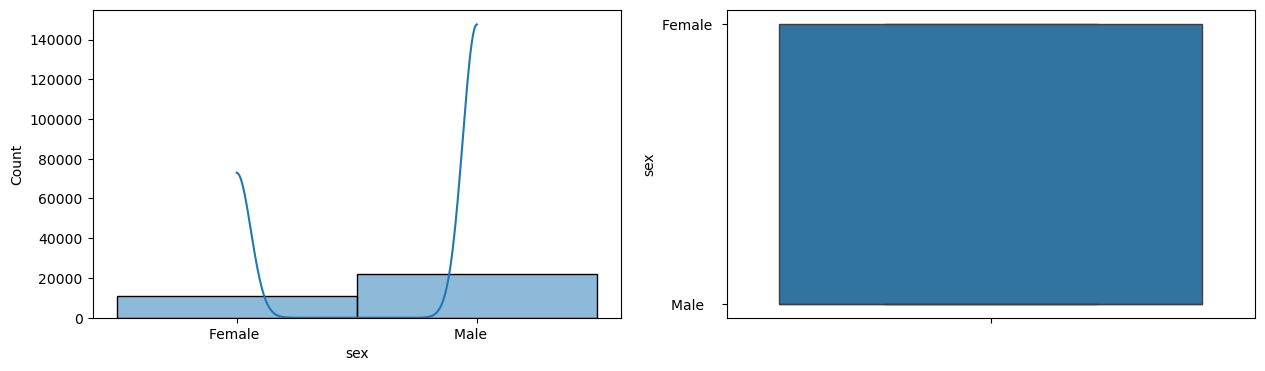

capital.gain


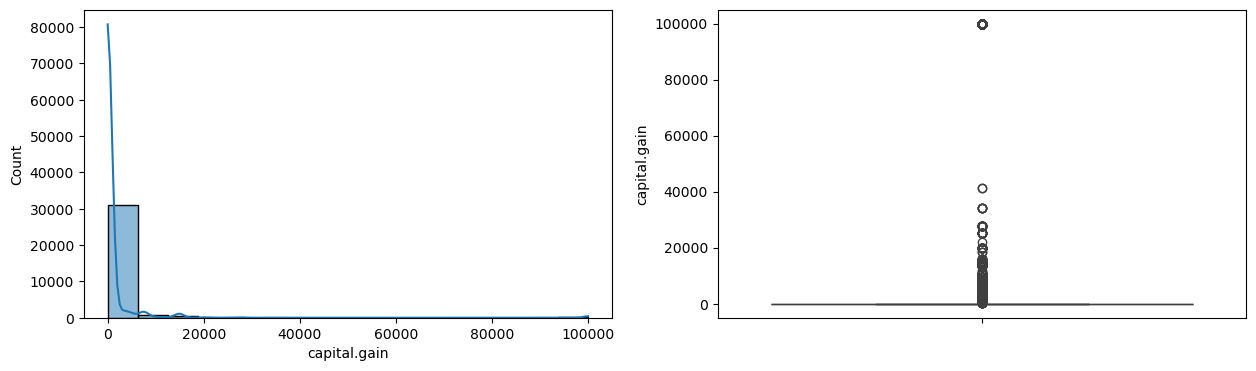

capital.loss


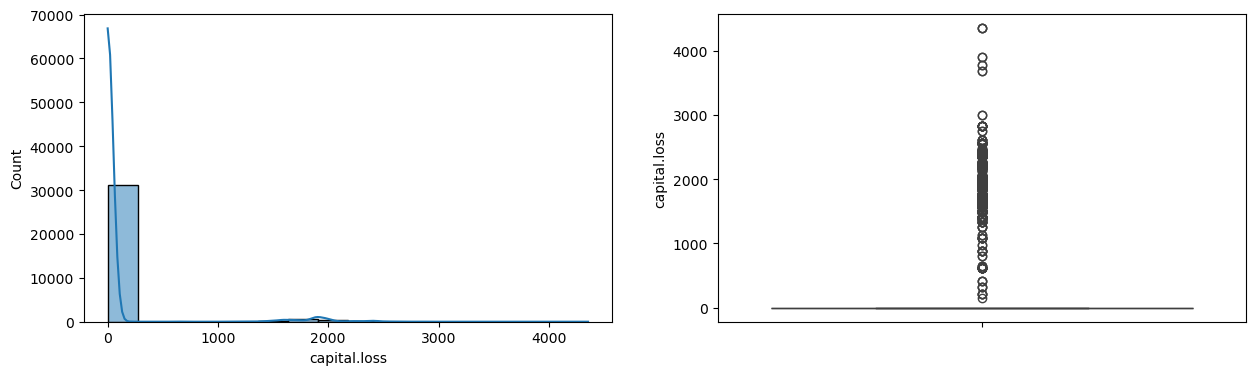

hours.per.week


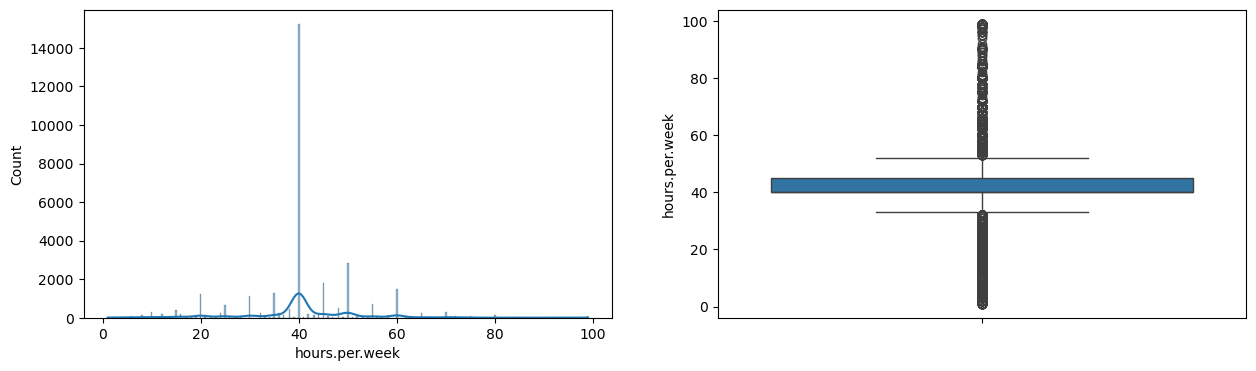

native.country


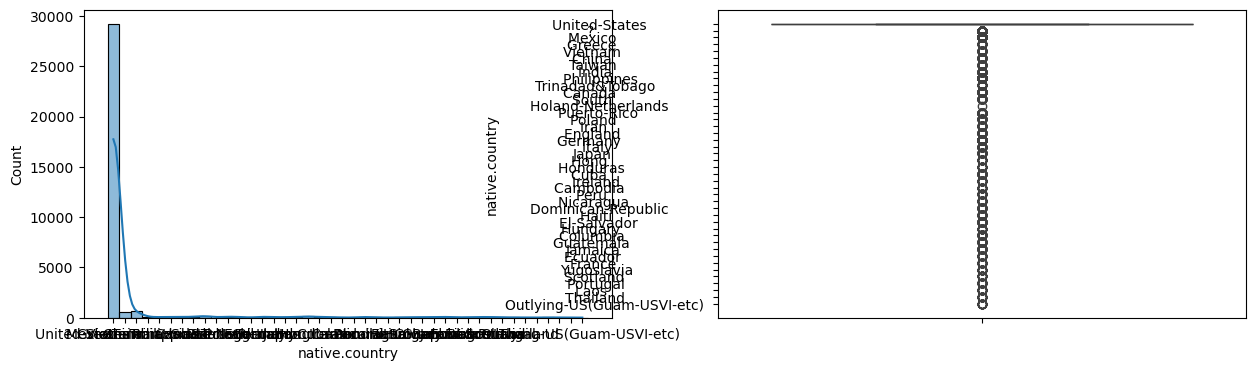

income


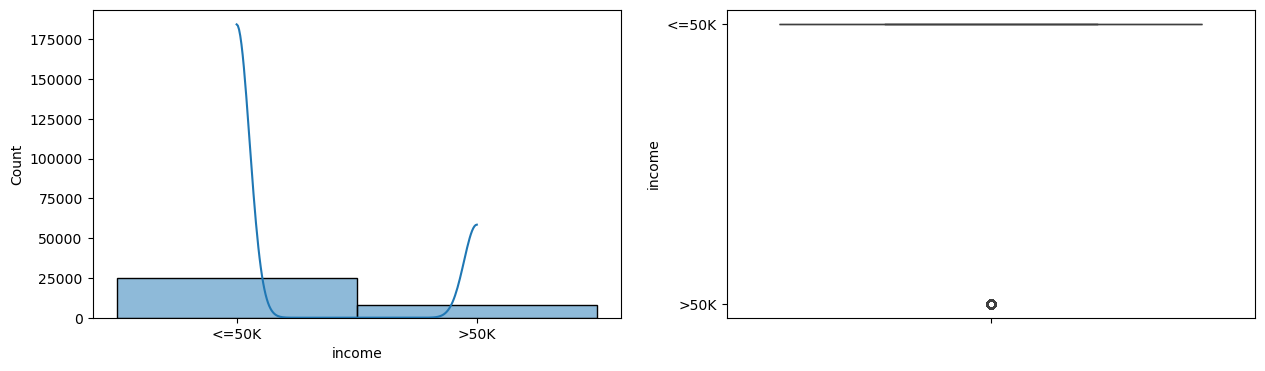

fnlwgt_ss


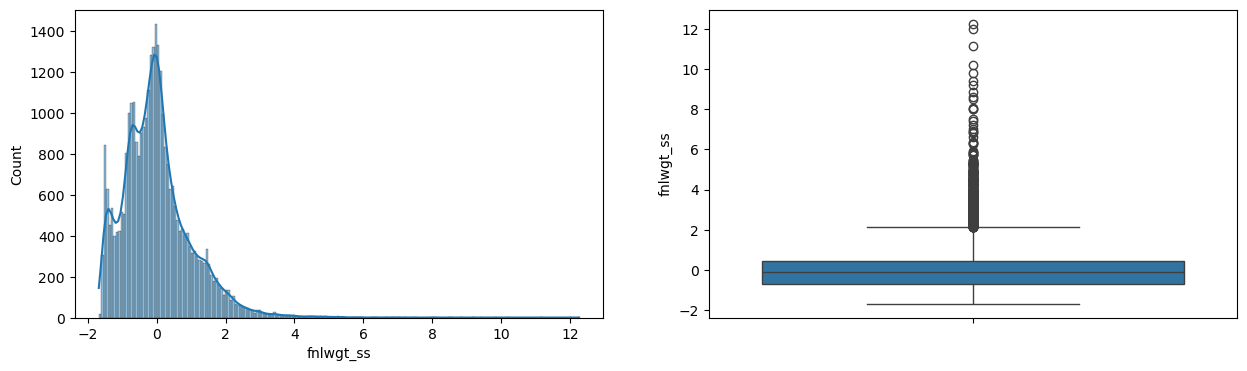

fnlwgt_mm


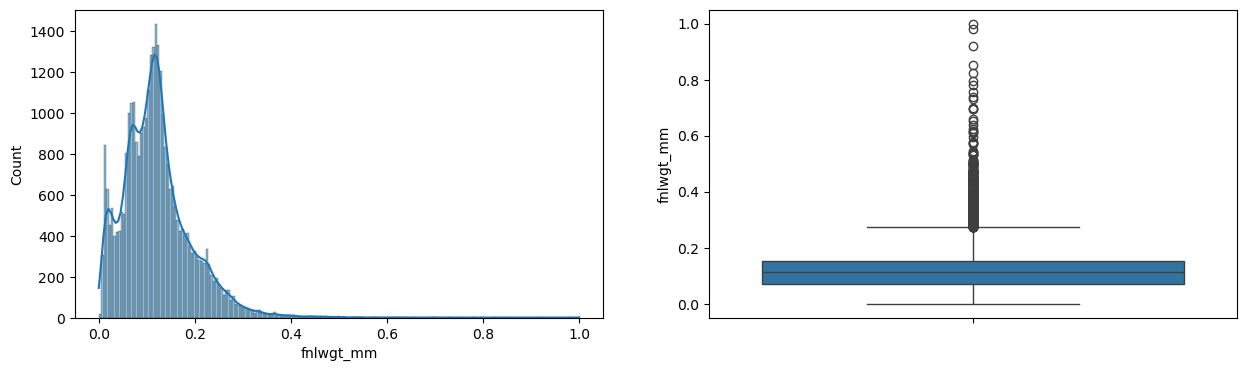

fnlwgt_rs


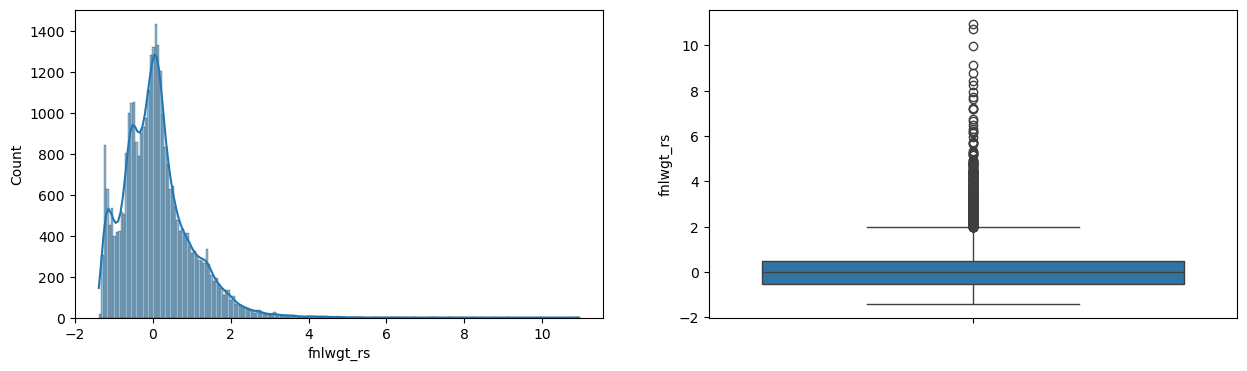

In [36]:
for col in df:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()

In [37]:
df.education.unique()

array(['HS-grad      ', 'Some-college ', '7th-8th      ', '10th         ',
       'Doctorate    ', 'Prof-school  ', 'Bachelors    ', 'Masters      ',
       '11th         ', 'Assoc-acdm   ', 'Assoc-voc    ', '1st-4th      ',
       '5th-6th      ', '12th         ', '9th          ', 'Preschool    '],
      dtype=object)

In [38]:
df.workclass.unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [39]:
df.occupation = df.occupation.str.replace("?","Prof-specialty")
df.occupation = df.occupation.str.replace(" ","", regex=True)
df.occupation

0           Prof-specialty
1          Exec-managerial
2           Prof-specialty
3        Machine-op-inspct
4           Prof-specialty
               ...        
32556      Protective-serv
32557         Tech-support
32558    Machine-op-inspct
32559         Adm-clerical
32560         Adm-clerical
Name: occupation, Length: 32561, dtype: object

In [40]:
cat_variable = df.select_dtypes(include = "object")
cat_variable

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_variable:
    cat_variable[col] = le.fit_transform(cat_variable[col])
cat_variable

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,3,11,6,9,1,4,0,39,0
1,3,11,6,3,1,4,0,39,0
2,3,15,6,9,4,2,0,39,0
3,3,5,0,6,4,4,0,39,0
4,3,15,5,9,3,4,0,39,0
...,...,...,...,...,...,...,...,...,...
32556,3,15,4,10,1,4,1,39,0
32557,3,7,2,12,5,4,0,39,0
32558,3,11,2,6,0,4,1,39,1
32559,3,11,6,0,4,4,0,39,0


In [42]:
from sklearn import linear_model


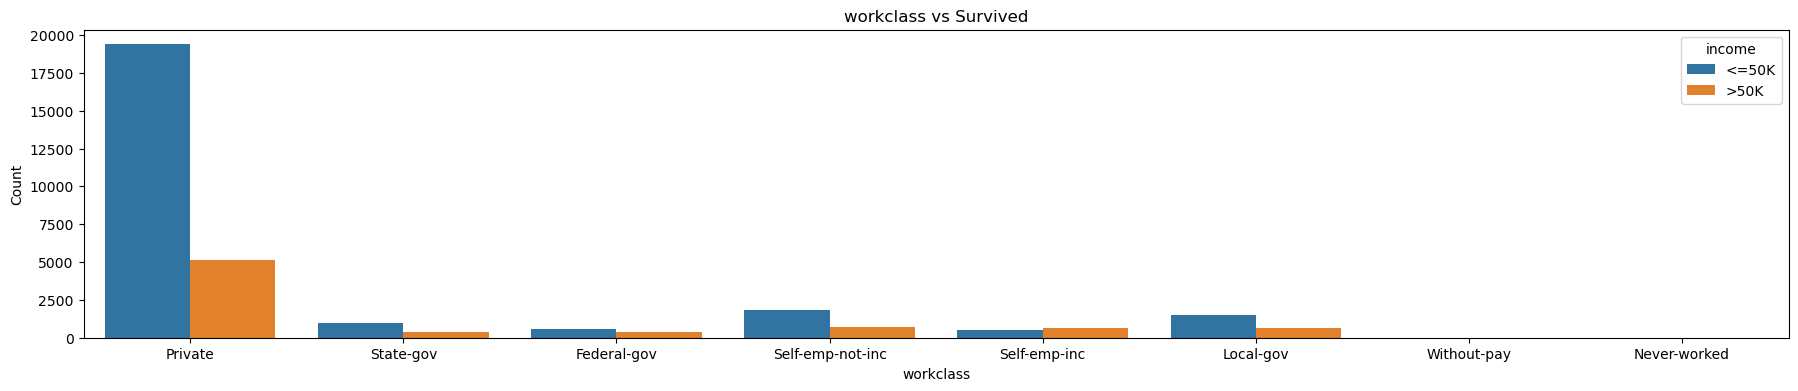

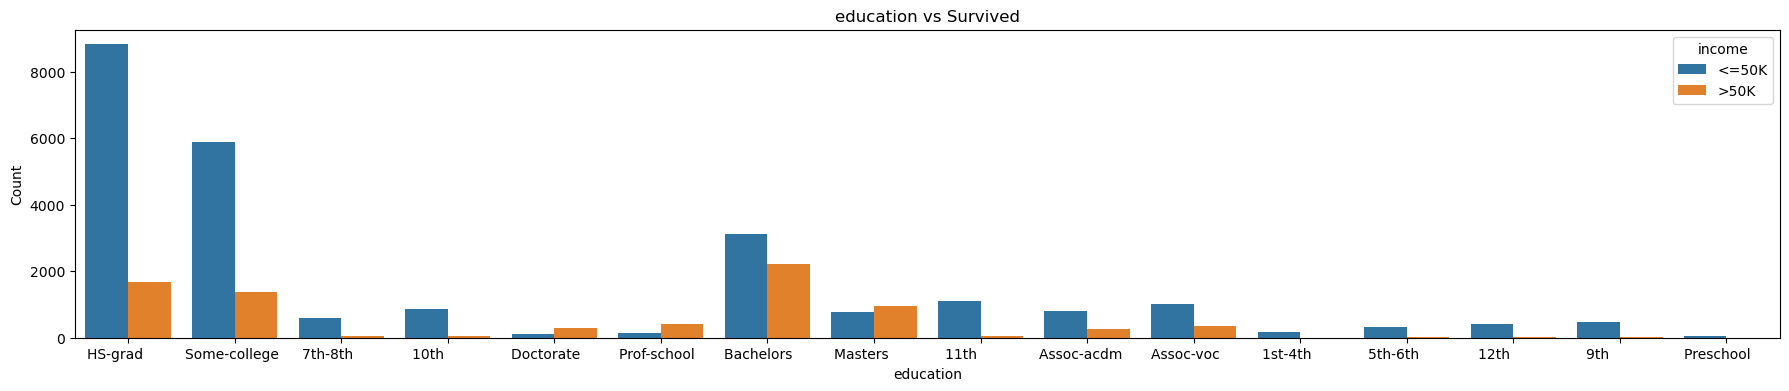

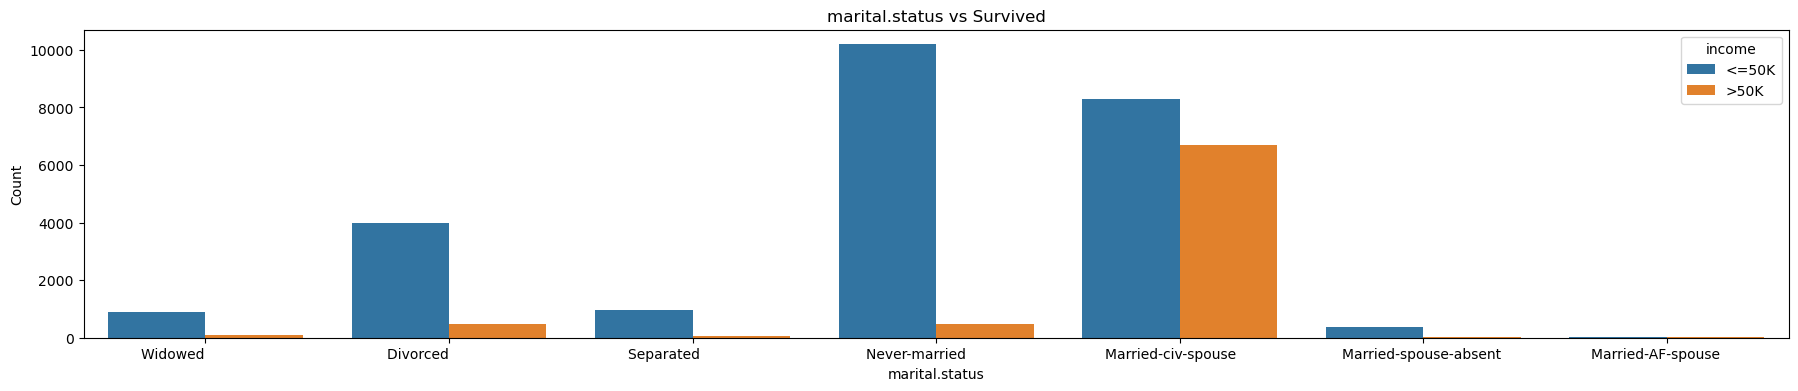

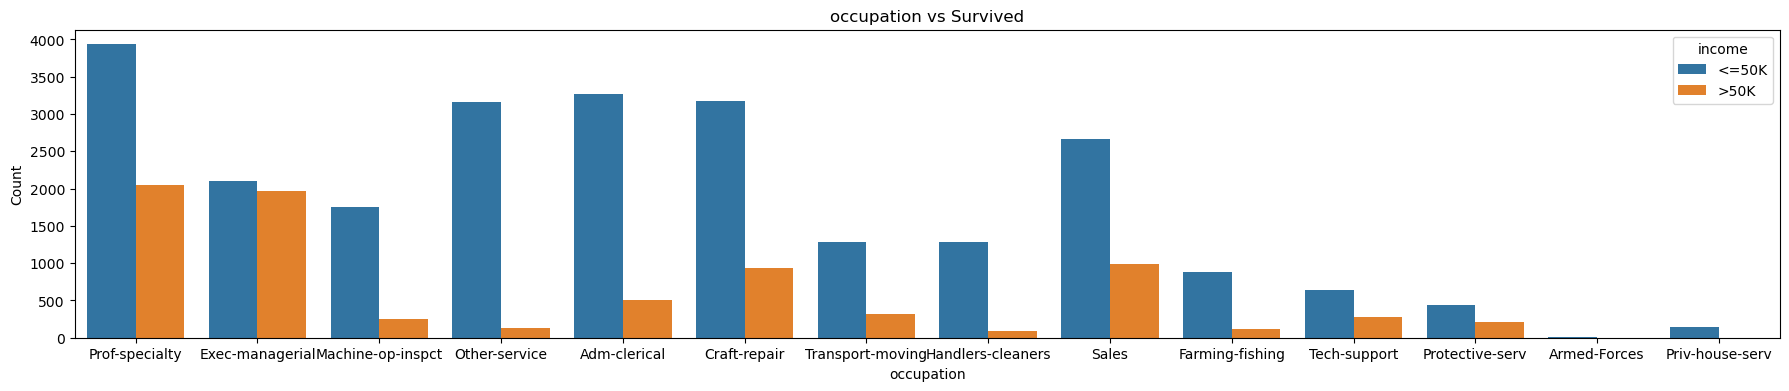

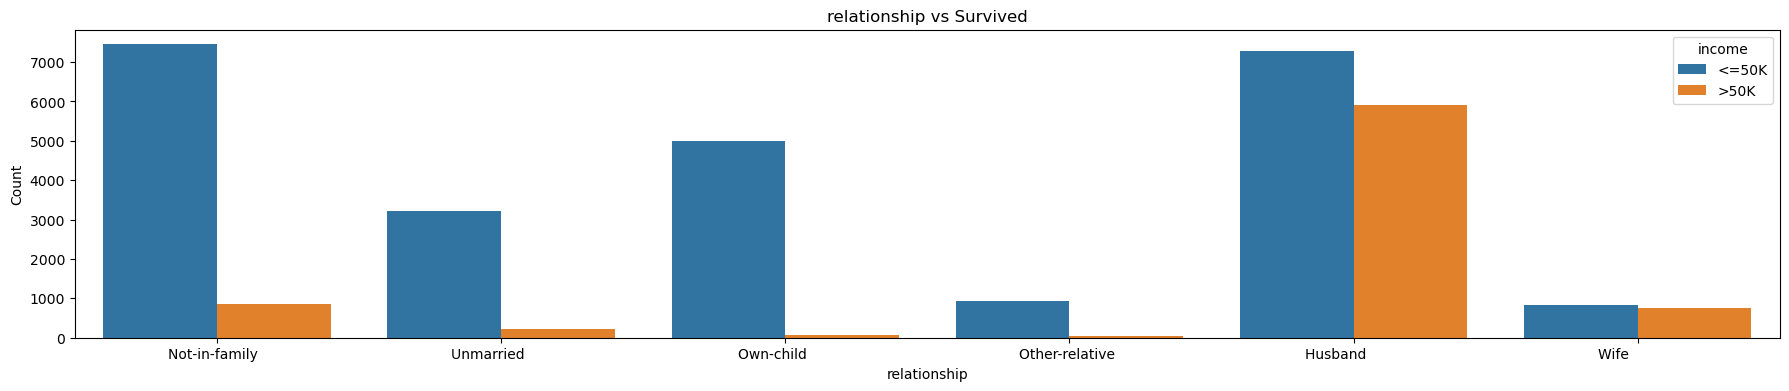

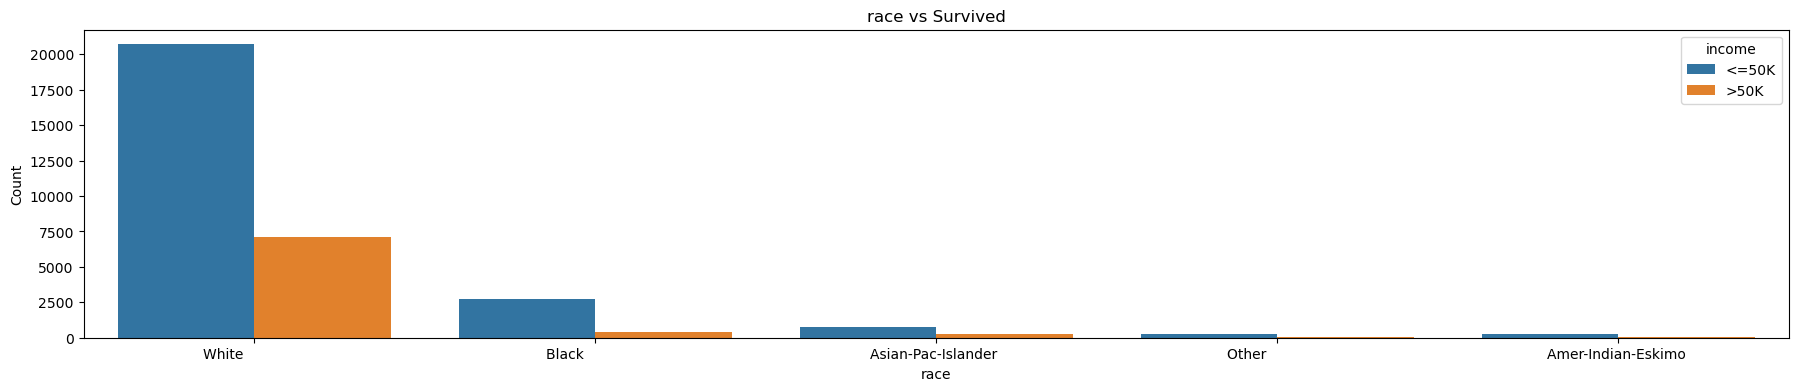

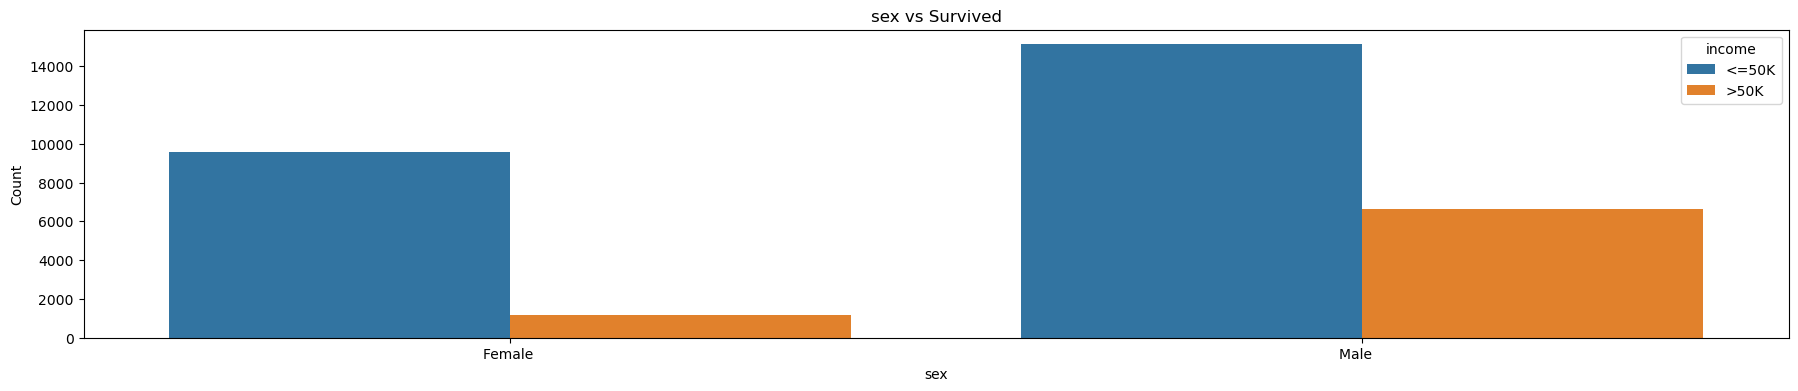

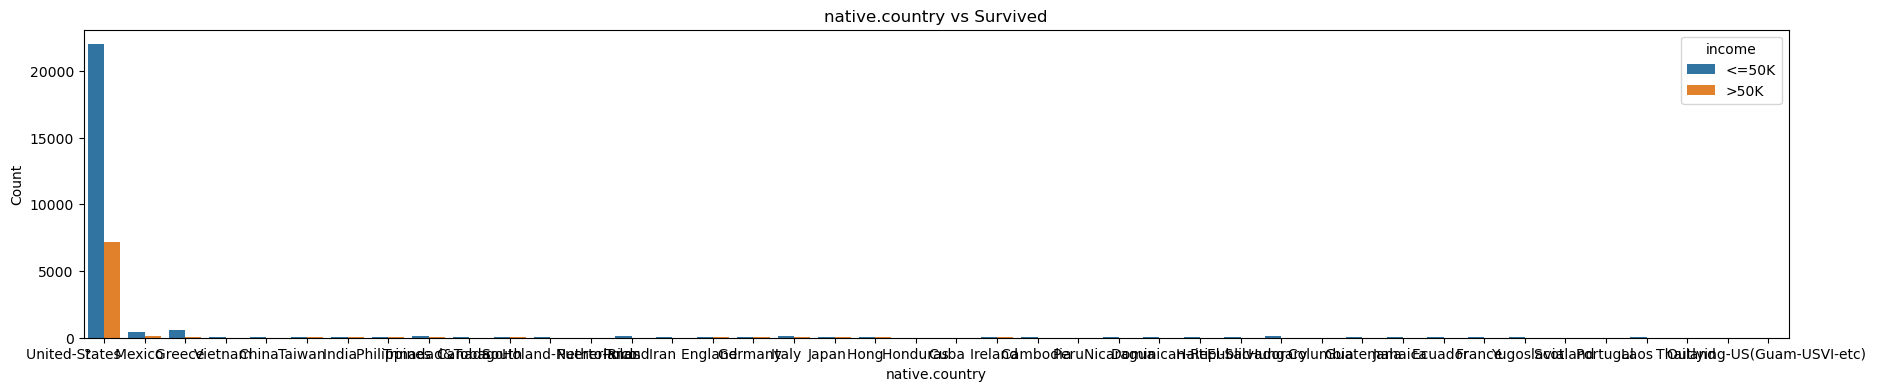

In [44]:
for col in cat_variable.columns:
    if col != "income":
        plt.figure(figsize=(22,4))
        sns.countplot(x=col, hue="income", data=df)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} vs Survived")
        plt.show()

In [49]:
from sklearn.model_selection import train_test_split

In [52]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,fnlwgt_ss,fnlwgt_mm,fnlwgt_rs
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,-1.067997,0.043987,-0.849686
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,-0.539169,0.081896,-0.381517
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,-0.035220,0.118021,0.064626
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,-0.468215,0.086982,-0.318703
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0.709482,0.171404,0.723906


In [55]:
for col in cat_variable:
    df[col] = cat_variable[col]
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,fnlwgt_ss,fnlwgt_mm,fnlwgt_rs
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,39,0,-1.067997,0.043987,-0.849686
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,39,0,-0.539169,0.081896,-0.381517
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,39,0,-0.035220,0.118021,0.064626
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,39,0,-0.468215,0.086982,-0.318703
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,39,0,0.709482,0.171404,0.723906


In [58]:
x_train, x_test, y_train, y_test =  train_test_split(df[['age','workclass','fnlwgt','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']],df['income'], test_size = 0.3, random_state = 5)
print(x_train, x_test, y_train, y_test)

       age  workclass  fnlwgt  education.num  marital.status  occupation  \
11928   42          3  266710             10               5           0   
25343   25          3  110138              9               4           7   
3107    44          4  103643              9               2           3   
19279   58          3  147989              9               2          13   
24666   28          3  271466              9               2           3   
...    ...        ...     ...            ...             ...         ...   
3046    39          4  543042              9               2           2   
26301   25          4  160261             13               4           3   
20463   33          0   26543             11               2          12   
18638   62          5  162347             15               2           9   
2915    38          3   59660             13               2          11   

       relationship  race  sex  capital.gain  capital.loss  hours.per.week  \
11928    

In [61]:
cat_variable.education.value_counts()

education
11    10501
15     7291
9      5355
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: count, dtype: int64